<a href="https://colab.research.google.com/github/krishnapriya333/Assignment/blob/main/Model_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Importing Dataset**

In [113]:
df = pd.read_csv('/content/sample_data/titanic_dataset .csv')

In [114]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [115]:
df.drop('PassengerId',axis=1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [116]:
df=df.drop('PassengerId',axis=1)

**Data Preprocessing**

In [117]:
df.shape

(891, 11)

In [118]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [120]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [121]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [122]:
df.corr()

<ipython-input-122-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [123]:
df=df.dropna()

In [124]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [125]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


**Data Visualization**

<Axes: xlabel='Survived', ylabel='Fare'>

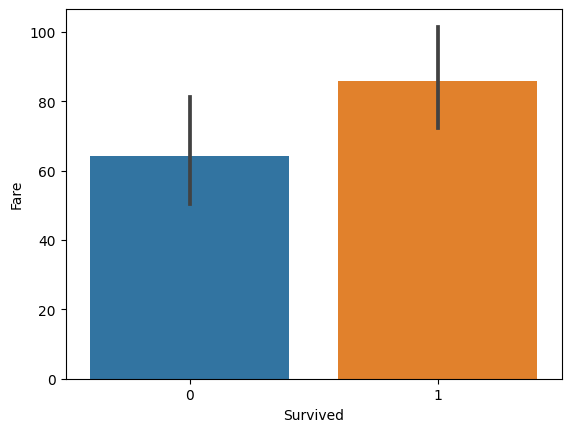

In [126]:
sns.barplot(x='Survived',y='Fare',data=df)

In [127]:
df['Embarked'].value_counts()

S    116
C     65
Q      2
Name: Embarked, dtype: int64

<Axes: xlabel='Survived', ylabel='Embarked'>

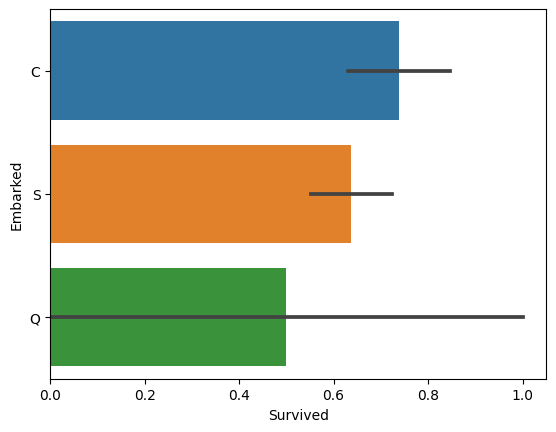

In [128]:
sns.barplot(x='Survived',y='Embarked',data=df)

<Axes: xlabel='Parch', ylabel='SibSp'>

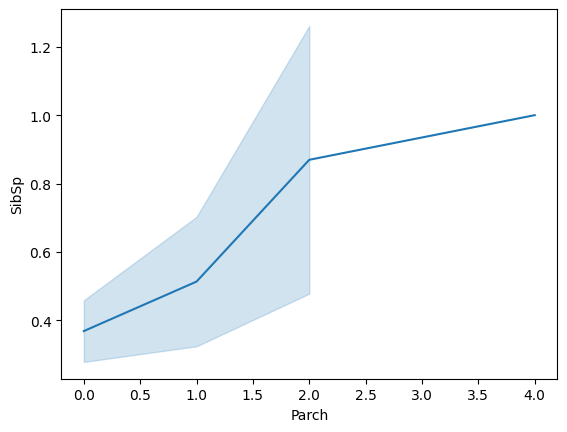

In [129]:
sns.lineplot(x='Parch',y='SibSp',data=df)

In [130]:
df=pd.get_dummies(df)

In [131]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Allen, Miss. Elisabeth Walton","Name_Allison, Master. Hudson Trevor","Name_Allison, Miss. Helen Loraine","Name_Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
1,1,1,38.0,1,0,71.2833,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,1,35.0,1,0,53.1000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0,1,54.0,0,0,51.8625,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10,1,3,4.0,1,1,16.7000,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
11,1,1,58.0,0,0,26.5500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,47.0,1,1,52.5542,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
872,0,1,33.0,0,0,5.0000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
879,1,1,56.0,0,1,83.1583,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
887,1,1,19.0,0,0,30.0000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


**Split the Dataset into Training and Testing data**

In [132]:
X=df.drop(['Survived'],axis=1)
y=df['Survived']

In [133]:
X

,Pclass,Age,SibSp,Parch,Fare,"Name_Allen, Miss. Elisabeth Walton","Name_Allison, Master. Hudson Trevor","Name_Allison, Miss. Helen Loraine","Name_Allison, Mrs. Hudson J C (Bessie Waldo Daniels)","Name_Anderson, Mr. Harry",...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
1,1,38.0,1,0,71.2833,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,35.0,1,0,53.1000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,1,54.0,0,0,51.8625,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10,3,4.0,1,1,16.7000,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
11,1,58.0,0,0,26.5500,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,47.0,1,1,52.5542,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
872,1,33.0,0,0,5.0000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
879,1,56.0,0,1,83.1583,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
887,1,19.0,0,0,30.0000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [134]:
y

1      1
3      1
6      0
10     1
11     1
      ..
871    1
872    0
879    1
887    1
889    1
Name: Survived, Length: 183, dtype: int64

In [135]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=42)

**Modelling**

In [136]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

**Evaluation**

In [137]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.7297297297297297
[[ 8  4]
 [ 6 19]]
              precision    recall  f1-score   support

           0       0.57      0.67      0.62        12
           1       0.83      0.76      0.79        25

    accuracy                           0.73        37
   macro avg       0.70      0.71      0.70        37
weighted avg       0.74      0.73      0.73        37



**KNN**

In [138]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

In [139]:
print(accuracy_score(knn_pred,y_test))
print(confusion_matrix(knn_pred,y_test))
print(classification_report(knn_pred,y_test))

0.6756756756756757
[[ 4  2]
 [10 21]]
              precision    recall  f1-score   support

           0       0.29      0.67      0.40         6
           1       0.91      0.68      0.78        31

    accuracy                           0.68        37
   macro avg       0.60      0.67      0.59        37
weighted avg       0.81      0.68      0.72        37



**SVM**

In [140]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
svc_pred = svc.predict(X_test)

In [141]:
acc=accuracy_score(svc_pred,y_test)
print(accuracy_score(svc_pred,y_test))
print(confusion_matrix(svc_pred,y_test))
print(classification_report(svc_pred,y_test,zero_division=0))

0.6216216216216216
[[ 0  0]
 [14 23]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.62      0.77        37

    accuracy                           0.62        37
   macro avg       0.50      0.31      0.38        37
weighted avg       1.00      0.62      0.77        37



**Cross Validation**

**Kfold**

In [142]:
from sklearn.model_selection import KFold
kfold_validator = KFold(10)
for train_index,test_index in kfold_validator.split(X,y):
    print('trainig index:',train_index)
    print('test index:',test_index)

trainig index: [ 19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182]
test index: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
trainig index: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75 

In [143]:
from sklearn.model_selection import cross_val_score
cv_result = cross_val_score(model,X,y,cv=kfold_validator)
cv_result

array([0.84210526, 0.78947368, 0.68421053, 0.94444444, 0.55555556,
       0.88888889, 0.77777778, 0.66666667, 0.77777778, 0.77777778])

In [144]:
np.mean(cv_result)

0.77046783625731

**Stratified Kfold**

In [145]:
from sklearn.model_selection import StratifiedKFold
skfold_validator = StratifiedKFold(n_splits=10)

In [146]:
for train_index,test_index in skfold_validator.split(X,y):
    print('trainig index:',train_index)
    print('test index:',test_index)

trainig index: [ 15  17  18  19  21  23  24  25  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182]
test index: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 20 22 26]
trainig index: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  16  20  22
  24  25  26  27  28  29  34  40  42  43  45  46  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75 

In [147]:
from sklearn.model_selection import cross_val_score
cv_result = cross_val_score(model,X,y,cv=skfold_validator)

In [148]:
np.mean(cv_result)

0.7587719298245614